In [1]:
import numpy as np
import pandas as pd
import os
import pymc3 as pm
import seaborn as sns
import arviz as az

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
df = pd.read_csv('2010_2019_cleaned_data.csv')
df = df.drop('Unnamed: 0', axis=1)

In [3]:
# cols = ['Number_in_Poverty','Percent_in_Poverty']

In [4]:
# def my_logit(num):
#         return np.log(num) - np.log(100-num)
df

,FIPS_County,Number_in_Poverty,Percent_in_Poverty,Median_Income,County_Name,population,year,Firms,Establishments,Employment,...,Plus:_Adjustment_for_residence_6,"Plus:_Dividends,_interest,_and_rent_7",Plus:_Personal_current_transfer_receipts,Population_(persons)_3,Proprietors_employment,Proprietors'_income_9,Supplements_to_wages_and_salaries,Total_employment,Wage_and_salary_employment,Wages_and_salaries
0,1,6722,20.5,37312,accomack county,32790,2010,734,826,9443,...,10723,222749,296704,33150,3731,74730,129958,18051,14320,464680
1,3,8419,9.1,61845,albemarle county,92516,2010,2297,2514,36318,...,-1038868,2180543,786560,142663,22196,844150,1026403,112944,90748,4102398
2,5,2096,13.1,43110,alleghany county,16000,2010,238,253,2365,...,-12285,102743,219003,22144,1352,16895,83295,9903,8551,351416
3,7,1432,11.4,49057,amelia county,12561,2010,280,286,1866,...,140314,59809,98657,12741,1662,34267,21827,4364,2702,86972
4,9,4221,13.6,42063,amherst county,31037,2010,567,601,6697,...,176592,140661,252811,32389,2921,38242,88203,12472,9551,329610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,740,16860,18.5,50411,portsmouth city,91135,2019,1443,1655,25744,...,-1703420,621620,1012180,94582,8607,153513,1106915,61320,52713,3170261
1046,760,42010,19.2,50949,richmond city,218802,2019,5487,6323,128474,...,-5847126,3254085,2059276,231027,31527,1162921,2546373,204415,172888,11222461
1047,770,19049,19.5,45534,roanoke city,97687,2019,2623,3132,75238,...,-1840390,835817,1118010,99216,9721,208394,824424,81099,71378,3630651
1048,800,8906,9.8,77847,suffolk city,90878,2019,1462,1684,25065,...,942526,846602,911183,92277,10472,143764,423449,45458,34986,1820896


In [7]:
mylist =['Firms',
        'Establishments',
        'Employment',
        'Payroll_$1000',
        'Earnings by place of work',
        'Employee and self-employed contributions for government social insurance',
        'Employer contributions for employee pension and insurance funds 8',
        'Employer contributions for government social insurance',
        'Equals: Net earnings by place of residence',
        'Farm income 2', 
        "Farm proprietors' income",
        'Less: Contributions for government social insurance 5',
        'Nonfarm personal income 1',
        "Nonfarm proprietors' income",
        'Personal income (thousands of dollars)',
        'Plus: Adjustment for residence 6',
        'Plus: Dividends, interest, and rent 7',
        'Plus: Personal current transfer receipts',
        'Population (persons) 3',
        'Proprietors employment',
        "Proprietors' income 9",
        'Supplements to wages and salaries',
        'Total employment',
        'Wage and salary employment',
        'Wages and salaries']

In [19]:
list2 = [x.replace(' ','_') for x in mylist]

In [20]:
list2

['Firms',
 'Establishments',
 'Employment',
 'Payroll_$1000',
 'Earnings_by_place_of_work',
 'Employee_and_self-employed_contributions_for_government_social_insurance',
 'Employer_contributions_for_employee_pension_and_insurance_funds_8',
 'Employer_contributions_for_government_social_insurance',
 'Equals:_Net_earnings_by_place_of_residence',
 'Farm_income_2',
 "Farm_proprietors'_income",
 'Less:_Contributions_for_government_social_insurance_5',
 'Nonfarm_personal_income_1',
 "Nonfarm_proprietors'_income",
 'Personal_income_(thousands_of_dollars)',
 'Plus:_Adjustment_for_residence_6',
 'Plus:_Dividends,_interest,_and_rent_7',
 'Plus:_Personal_current_transfer_receipts',
 'Population_(persons)_3',
 'Proprietors_employment',
 "Proprietors'_income_9",
 'Supplements_to_wages_and_salaries',
 'Total_employment',
 'Wage_and_salary_employment',
 'Wages_and_salaries']

In [21]:
df[list2] = df[list2].div(df.population, axis=0)

In [23]:
var1 = ['population', 'Percent_in_Poverty'] + list2

In [24]:
var1

['population',
 'Percent_in_Poverty',
 'Firms',
 'Establishments',
 'Employment',
 'Payroll_$1000',
 'Earnings_by_place_of_work',
 'Employee_and_self-employed_contributions_for_government_social_insurance',
 'Employer_contributions_for_employee_pension_and_insurance_funds_8',
 'Employer_contributions_for_government_social_insurance',
 'Equals:_Net_earnings_by_place_of_residence',
 'Farm_income_2',
 "Farm_proprietors'_income",
 'Less:_Contributions_for_government_social_insurance_5',
 'Nonfarm_personal_income_1',
 "Nonfarm_proprietors'_income",
 'Personal_income_(thousands_of_dollars)',
 'Plus:_Adjustment_for_residence_6',
 'Plus:_Dividends,_interest,_and_rent_7',
 'Plus:_Personal_current_transfer_receipts',
 'Population_(persons)_3',
 'Proprietors_employment',
 "Proprietors'_income_9",
 'Supplements_to_wages_and_salaries',
 'Total_employment',
 'Wage_and_salary_employment',
 'Wages_and_salaries']

In [25]:
df_cent = df.copy()
#Center and Scale
for i in var1: 
    df_cent[i] = (df[i]-np.average(df[i]))/np.std(df[i])

df_cent

,FIPS_County,Number_in_Poverty,Percent_in_Poverty,Median_Income,County_Name,population,year,Firms,Establishments,Employment,...,Plus:_Adjustment_for_residence_6,"Plus:_Dividends,_interest,_and_rent_7",Plus:_Personal_current_transfer_receipts,Population_(persons)_3,Proprietors_employment,Proprietors'_income_9,Supplements_to_wages_and_salaries,Total_employment,Wage_and_salary_employment,Wages_and_salaries
0,1,6722,1.226939,37312,accomack county,-0.286259,2010,0.581985,0.731091,0.227258,...,-0.306821,-0.482416,-0.285955,-0.392367,-0.383308,-0.199077,-0.247787,-0.101110,-0.041060,-0.337258
1,3,8419,-0.807817,61845,albemarle county,0.157985,2010,1.035448,1.070879,1.038347,...,-1.275693,2.409168,-0.419466,0.990226,2.211818,3.225601,1.228793,2.200691,2.025080,1.395622
2,5,2096,-0.093867,43110,alleghany county,-0.411144,2010,-0.811826,-0.875795,-0.859921,...,-0.398613,-0.546494,0.846899,0.578784,-0.985838,-0.810993,0.009512,0.133892,0.329965,0.110281
3,7,1432,-0.397296,49057,amelia county,-0.436723,2010,0.564603,0.316143,-0.854162,...,0.602315,-0.832608,-0.577621,-0.383642,-0.002063,0.025555,-0.708644,-0.798478,-0.882475,-0.753513
4,9,4221,-0.004624,42063,amherst county,-0.299298,2010,-0.181999,-0.267268,-0.332803,...,0.142793,-0.872155,-0.506500,-0.307540,-0.788042,-0.722838,-0.480005,-0.611606,-0.530813,-0.541238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,740,16860,0.869964,50411,portsmouth city,0.147713,2019,-0.633903,-0.473586,0.184583,...,-1.901323,-0.477647,0.216548,-0.322479,-0.781276,-0.496548,1.446533,0.319019,0.496906,0.846765
1046,760,42010,0.994905,50949,richmond city,1.097304,2019,1.081723,1.366379,2.547761,...,-2.574749,0.910116,-0.197315,-0.275488,0.240204,1.319768,1.341326,1.216655,1.300896,1.794675
1047,770,19049,1.048452,45534,roanoke city,0.196447,2019,1.410898,1.908394,3.967308,...,-1.913773,-0.178563,0.299194,-0.380200,-0.676974,-0.272002,0.679058,0.859336,1.075072,0.983445
1048,800,8906,-0.682876,77847,suffolk city,0.145801,2019,-0.586789,-0.410109,0.132829,...,0.535303,-0.047613,-0.047171,-0.380871,-0.353542,-0.547834,-0.103630,-0.273819,-0.237513,-0.000384


In [26]:
import copy

In [27]:
var2 = copy.deepcopy(var1)
var2.remove('Percent_in_Poverty')

In [28]:
var2

['population',
 'Firms',
 'Establishments',
 'Employment',
 'Payroll_$1000',
 'Earnings_by_place_of_work',
 'Employee_and_self-employed_contributions_for_government_social_insurance',
 'Employer_contributions_for_employee_pension_and_insurance_funds_8',
 'Employer_contributions_for_government_social_insurance',
 'Equals:_Net_earnings_by_place_of_residence',
 'Farm_income_2',
 "Farm_proprietors'_income",
 'Less:_Contributions_for_government_social_insurance_5',
 'Nonfarm_personal_income_1',
 "Nonfarm_proprietors'_income",
 'Personal_income_(thousands_of_dollars)',
 'Plus:_Adjustment_for_residence_6',
 'Plus:_Dividends,_interest,_and_rent_7',
 'Plus:_Personal_current_transfer_receipts',
 'Population_(persons)_3',
 'Proprietors_employment',
 "Proprietors'_income_9",
 'Supplements_to_wages_and_salaries',
 'Total_employment',
 'Wage_and_salary_employment',
 'Wages_and_salaries']

In [29]:
all_vars = "+".join(var2)

In [30]:
formula = "Percent_in_Poverty~"+all_vars

In [31]:
formula

"Percent_in_Poverty~population+Firms+Establishments+Employment+Payroll_$1000+Earnings_by_place_of_work+Employee_and_self-employed_contributions_for_government_social_insurance+Employer_contributions_for_employee_pension_and_insurance_funds_8+Employer_contributions_for_government_social_insurance+Equals:_Net_earnings_by_place_of_residence+Farm_income_2+Farm_proprietors'_income+Less:_Contributions_for_government_social_insurance_5+Nonfarm_personal_income_1+Nonfarm_proprietors'_income+Personal_income_(thousands_of_dollars)+Plus:_Adjustment_for_residence_6+Plus:_Dividends,_interest,_and_rent_7+Plus:_Personal_current_transfer_receipts+Population_(persons)_3+Proprietors_employment+Proprietors'_income_9+Supplements_to_wages_and_salaries+Total_employment+Wage_and_salary_employment+Wages_and_salaries"

In [32]:
n_counties = len(df_cent.County_Name.unique())
county_names = df_cent.County_Name.unique()
df_cent = df_cent.assign(County_Name = df_cent.County_Name.astype('category'))
county_idxs, counties = pd.factorize(df_cent.County_Name)

In [33]:
df_cent.dtypes

FIPS_County                                                                    int64
Number_in_Poverty                                                              int64
Percent_in_Poverty                                                           float64
Median_Income                                                                  int64
County_Name                                                                 category
population                                                                   float64
year                                                                           int64
Firms                                                                        float64
Establishments                                                               float64
Employment                                                                   float64
Payroll_$1000                                                                float64
Earnings_by_place_of_work                                        

## Normal regression without group nodes

In [35]:
with pm.Model() as model:
    
    # county_idx = pm.Data('county_idx', county_idxs)    
    # Intercept
    a = pm.Normal('a', mu=0,sd=1)

    # Employment effect
    b = pm.Normal('b', mu=0,sd=1)

    # Model error
    eps = pm.HalfCauchy('eps', 5)
    
    # Linear regression
    # pov_est = a[county_idx] + b[county_idx] * df_cent.Employment.values
    pov_est = a + b * df_cent.Employment.values
    
    # Data likelihood
    pov_like = pm.Normal('pov_like', mu=pov_est, sigma=eps, observed=df_cent.Percent_in_Poverty)

In [36]:
with model:
    step = pm.NUTS(target_accept=0.95)
    trace = pm.sample(draws=1000,tune=1000,cores = 16,step=step,return_inferencedata=False)

Multiprocess sampling (16 chains in 16 jobs)
NUTS: [eps, b, a]


Sampling 16 chains for 1_000 tune and 1_000 draw iterations (16_000 + 16_000 draws total) took 82 seconds.


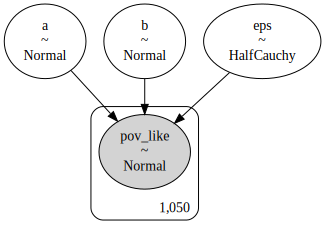

In [37]:
pm.model_to_graphviz(model)

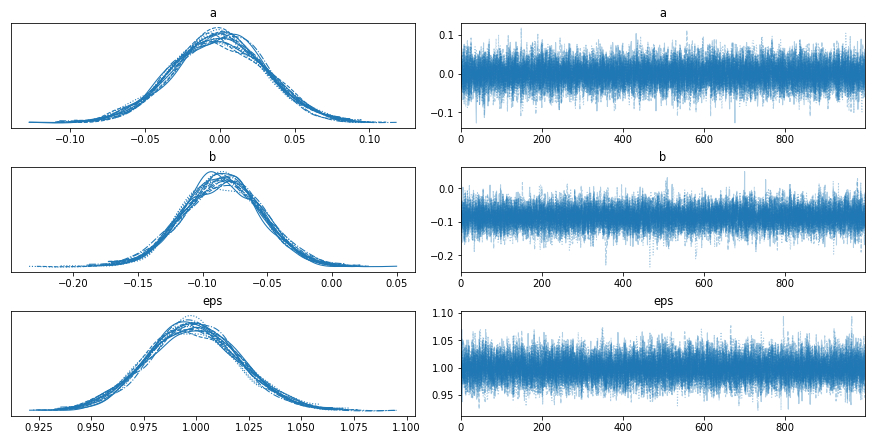

In [38]:
with model:
    az.plot_trace(trace)

Distributions are relatively flat for the effect of employment on percent in poverty, but they are centered below 0, implying that as employment increases there is a higher probability that percent in poverty will decrease.

## Hierarchical clusters

In [39]:
with pm.Model() as hierarchical_model:
    
    county_idx = pm.Data('county_idx', county_idxs)    
    # Hyperpriors for group nodes
    mu_a = pm.Normal('mu_a', mu=0., sigma=1)
    sigma_a = pm.HalfCauchy('sigma_a', 1)
    mu_b = pm.Normal('mu_b', mu=0., sigma=1)
    sigma_b = pm.HalfCauchy('sigma_b', 1)

    # Intercept for each county, distributed around group mean mu_a
    # Above we just set mu and sd to a fixed value while here we
    # plug in a common group distribution for all a and b (which are
    # vectors of length n_counties).
    a_offset = pm.Normal('a_offset', mu=0, sd=1, shape = n_counties)
    a = pm.Deterministic('a', mu_a + a_offset * sigma_a)

    # Intercept for each county, distributed around group mean mu_a
    b_offset = pm.Normal('b_offset', mu=0, sd=1, shape = n_counties)
    b = pm.Deterministic('b', mu_b + b_offset * sigma_b)

    # Model error
    eps = pm.HalfCauchy('eps', 5)
    
    # Linear regression
    pov_est = a[county_idx] + b[county_idx] * df_cent.Employment.values
    
    # Data likelihood
    pov_like = pm.Normal('pov_like', mu=pov_est, sigma=eps, observed=df_cent.Percent_in_Poverty)

Multiprocess sampling (16 chains in 16 jobs)
NUTS: [eps, b_offset, a_offset, sigma_b, mu_b, sigma_a, mu_a]


Sampling 16 chains for 1_000 tune and 1_000 draw iterations (16_000 + 16_000 draws total) took 121 seconds.
The number of effective samples is smaller than 10% for some parameters.


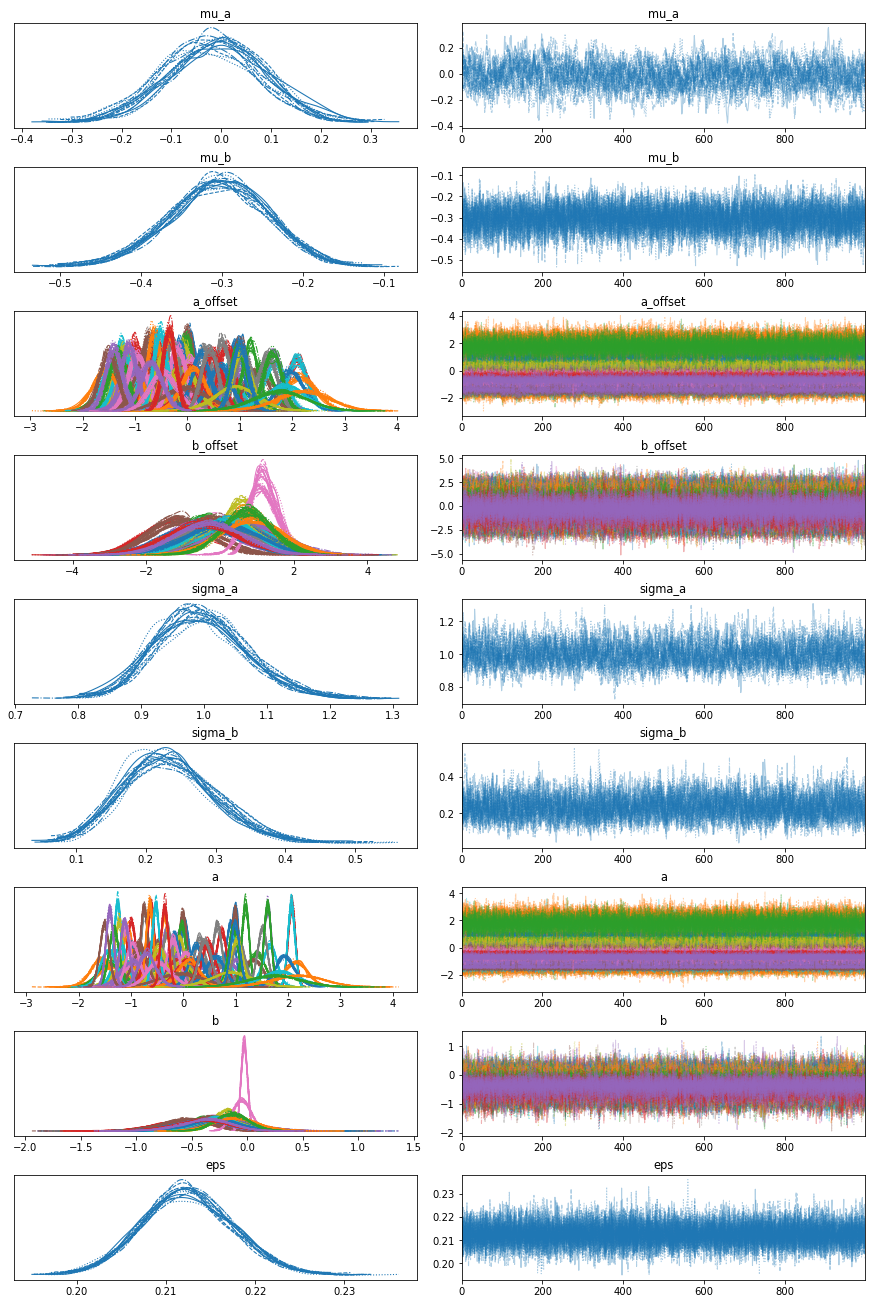

In [40]:
with hierarchical_model:
    step = pm.NUTS(target_accept=0.95)
    trace = pm.sample(draws=1000,tune=1000,cores = 16,step=step,return_inferencedata=False)
    az.plot_trace(trace)

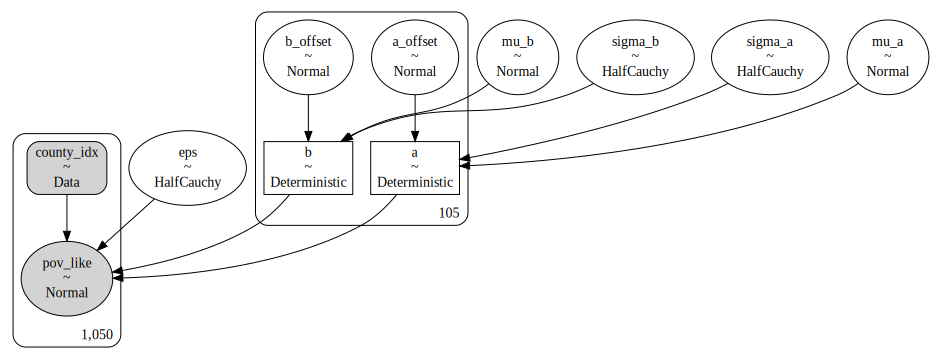

In [41]:
pm.model_to_graphviz(hierarchical_model)